In [39]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 29 02:00:14 2017

@author: Alexandre Marcotte
"""
from importlib import reload
import read_legs
import basic_functions
reload(read_legs)
reload(basic_functions)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
path = r"C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/" 
legs, legs_axis = read_legs.read_training_data(path)


C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D0.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D1.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D2.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D4.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D5.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D6.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D7.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D8.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D9.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D10.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D11.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D12

C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D102.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D103.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D104.aop_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D105.ply_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D106.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D107.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D108.ply_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D109.aop_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D110.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D111.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/D112.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Po

C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G55.ply_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G56.aop_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G57.obj_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G58.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G59.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G60.ply_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G61.obj_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G62.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G63.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G64.stl_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\dataset_AI/G65.aop_2.vtk
C:\Users\alexa\Documents\CODING_A2017_POLY\Projet_4\Poly-AI\datas

In [41]:
all_closest_pt = [leg.find_closest_pt_to_axis_3D(leg_axis)[0]
              for leg, leg_axis in zip(legs, legs_axis)] 


In [74]:
def create_features(SAMPLE_BEGIN=0, SAMPLE_END=100):
    all_pt_curvature = []
    # Raduis
    all_pt_radius = []
    NUM_RADIUS_BEFORE = 10
    all_pt_radius_before = []
    NUM_RADIUS_AFTER = 10
    all_pt_radius_after = []
    
    all_pt_torsion = []
    all_pt_normal = []
    all_pt_tangente = []
    smallest_rad_under_knee = []
    pt_class = []
    leg_num = []
    pt_num_array = []
    pt_num = 0

    for leg_no, (leg, closest_pt) in enumerate(zip(legs[SAMPLE_BEGIN:SAMPLE_END], 
                                                  all_closest_pt[SAMPLE_BEGIN:SAMPLE_END])): 
        # Normalize: 
        normalized_curvature = basic_functions.normalize_minus_one_to_one(leg.Curvature)
        normalized_radius = basic_functions.normalize_minus_one_to_one(leg.Radius)
        normalized_torsion = basic_functions.normalize_minus_one_to_one(leg.Torsion)
        
        # Select all the value for the curvatures for all points
        for pt_no, curvature in enumerate(normalized_curvature): 
            all_pt_curvature.append(curvature[0])
            leg_num.append(leg_no)
            # Classify the points base on their position
            if pt_no <= closest_pt: # - 15: 
                pt_class.append(0)
            elif pt_no > closest_pt: # + 15: 
                pt_class.append(1)
#             else: # points in the center of the leg
#                 pt_class.append(2)

            pt_num_array.append(pt_no)
            pt_num += 1

        # Select all the value for the radius for all points
        for radius_no, radius in enumerate(normalized_radius): 
            # Selecting the radius of the current point
            all_pt_radius.append(radius[0])
            # Take radius before
            if radius_no - NUM_RADIUS_BEFORE <= 0:
                all_pt_radius_before.append(normalized_radius[0][0])
            else: 
                all_pt_radius_before.append(\
                    normalized_radius[radius_no-NUM_RADIUS_BEFORE][0])
            # Take radius after
            if radius_no + NUM_RADIUS_BEFORE >= len(normalized_radius):
                all_pt_radius_after.append(normalized_radius[-1][0])
            else: 
                all_pt_radius_after.append(\
                    normalized_radius[radius_no+NUM_RADIUS_AFTER][0])
            
        # Select all the value for the torsion for all points
        for torsion in normalized_torsion: 
            all_pt_torsion.append(torsion[0])
        # Select all the value for the normal for all points
        for normal in leg.Normal: 
            all_pt_normal.append(normal)
        # Select all the value for the normal for all points
        for tangente in leg.Tangent: 
            all_pt_tangente.append(tangente)
        # Find the distance with the pt_min_radius_under_knee_ball:
        for pt in leg.Points:
            smallest_rad_under_knee.append(
                basic_functions.find_dist_3D_btw_two_pts(
                pt, leg.Points[leg.pt_min_radius_under_knee_ball]))
    
    # Create a pandas dataframe (better for visualization)
    data = np.vstack((np.array(all_pt_curvature), 
                      np.array(all_pt_radius),
                      np.array(all_pt_torsion),
                      np.array(all_pt_normal)[:, 0],
                      np.array(all_pt_normal)[:, 1],
                      np.array(all_pt_normal)[:, 2],
                      np.array(all_pt_tangente)[:, 0],
                      np.array(all_pt_tangente)[:, 1],
                      np.array(all_pt_tangente)[:, 2],
                      np.array(smallest_rad_under_knee),
                      np.array(pt_num_array),
                      np.array(all_pt_radius_before), 
                      np.array(all_pt_radius_after),
                      
                      np.array(pt_class)))

    all_pt_df = pd.DataFrame(data.T)
    
    return all_pt_df
    

In [75]:
train_test_split_pt = 213
all_pt_df = create_features(0, train_test_split_pt)

# Add a name to the colums of the data frame
df_cols_name = ['curvature',
                'radius',
                'torsion',
                'normal_x',
                'normal_y',
                'normal_z',
                'tangente_x',
                'tangente_y',
                'tangente_z',
                'smallest_rad_under_knee',
                'pt_num_array',
                'all_pt_radius_before',
                'all_pt_radius_after',
            
                'pt_class']

all_pt_df.columns = df_cols_name
all_pt_df

curvature    radius   torsion  normal_x  normal_y  normal_z  \
0      -1.000000  1.000000  0.560008 -0.567633 -0.823251 -0.007182   
1      -0.982180  0.980345  0.560008 -0.567633 -0.823251 -0.007182   
2      -0.929147  0.935151  0.562943 -0.568326 -0.822775 -0.006804   
3      -0.877166  0.930849  0.567243 -0.568896 -0.822387 -0.006045   
4      -0.827370  0.875415  0.572577 -0.570747 -0.821112 -0.004812   
5      -0.780535  0.835185  0.577212 -0.573750 -0.819024 -0.003129   
6      -0.737166  0.831476  0.581903 -0.577674 -0.816267 -0.001030   
7      -0.697775  0.786634  0.586795 -0.582674 -0.812705  0.001475   
8      -0.662545  0.745775  0.591074 -0.588710 -0.808332  0.004361   
9      -0.631367  0.715765  0.595735 -0.595573 -0.803266  0.007588   
10     -0.604232  0.652427  0.599930 -0.603583 -0.797222  0.011154   
11     -0.580634  0.575038  0.603708 -0.612268 -0.790508  0.015002   
12     -0.560323  0.559587  0.607574 -0.621859 -0.782896  0.019127   
13     -0.542786  0.487886  0.610861 -0.632155 -0.774486  0.023491   
14     -0.527517  0.424496  0.613822 -0.643064 -0.765298  0.028069   
15     -0.514168  0.371415  0.616567 -0.654490 -0.755357  0.032835   
16     -0.502255  0.310750  0.619090 -0.666371 -0.744663  0.037769   
17     -0.491356  0.269805  0.620957 -0.678605 -0.733252  0.042847   
18     -0.481204  0.219328  0.622518 -0.690948 -0.721307  0.048038   
19     -0.471499  0.150928  0.624196 -0.703426 -0.708765  0.053330   
20     -0.462018  0.143925  0.625188 -0.715977 -0.695651  0.058707   
21     -0.452549 -0.022853  0.625990 -0.728307 -0.682243  0.064133   
22     -0.442966 -0.046957  0.626704 -0.740544 -0.668393  0.069608   
23     -0.433101 -0.072269  0.626942 -0.752457 -0.654345  0.075102   
24     -0.422882 -0.107922  0.627092 -0.764026 -0.640130  0.080603   
25     -0.412252 -0.137871  0.626755 -0.775185 -0.625840  0.086093   
26     -0.401128 -0.143902  0.625940 -0.785787 -0.611683  0.091552   
27     -0.389423 -0.173655  0.624814 -0.795794 -0.597754  0.096965   
28     -0.377213 -0.176599  0.622985 -0.805146 -0.584184  0.102318   
29     -0.364352 -0.241040  0.620101 -0.813706 -0.571233  0.107591   
...          ...       ...       ...       ...       ...       ...   
44606  -0.757354 -0.584554  0.417644  0.979400  0.176436  0.098210   
44607  -0.751854 -0.600325  0.423013  0.980967  0.167153  0.098815   
44608  -0.745663 -0.617943  0.424211  0.982331  0.158429  0.099628   
44609  -0.737990 -0.622960  0.425077  0.983959  0.147695  0.100057   
44610  -0.729479 -0.636858  0.423555  0.985335  0.137706  0.100759   
44611  -0.720301 -0.639185  0.421838  0.986463  0.128586  0.101771   
44612  -0.709645 -0.657964  0.418574  0.987341  0.120499  0.103142   
44613  -0.698446 -0.663331  0.415329  0.987770  0.115024  0.105257   
44614  -0.686813 -0.673853  0.411853  0.987990  0.110723  0.107781   
44615  -0.674863 -0.684474  0.406940  0.987790  0.109210  0.111101   
44616  -0.662304 -0.698231  0.402655  0.987158  0.110618  0.115250   
44617  -0.650581 -0.705703  0.400214  0.986191  0.114114  0.120024   
44618  -0.639396 -0.718762  0.397873  0.985060  0.118353  0.125094   
44619  -0.629198 -0.746065  0.393579  0.983575  0.124473  0.130715   
44620  -0.620477 -0.758956  0.390695  0.981501  0.133607  0.137131   
44621  -0.614079 -0.769603  0.390320  0.979231  0.143051  0.143678   
44622  -0.610170 -0.769898  0.388848  0.976815  0.152498  0.150255   
44623  -0.609625 -0.771759  0.387063  0.973935  0.163527  0.157191   
44624  -0.612522 -0.784543  0.387346  0.970802  0.174912  0.164161   
44625  -0.620124 -0.796200  0.387436  0.967670  0.185530  0.170860   
44626  -0.632470 -0.797516  0.388006  0.964244  0.196750  0.177549   
44627  -0.649245 -0.825549  0.388964  0.961023  0.206585  0.183731   
44628  -0.672004 -0.835142  0.388766  0.957590  0.216829  0.189756   
44629  -0.699917 -0.855010  0.391328  0.954126  0.226836  0.195420   
44630  -0.733055 -0.864094  0.394352  0.951418  0.234013  0.200102   
44631  -0.771332 

#### Name data based on Scikit-learn naming convention

In [76]:
# Create the features (X) and the test set (y)
# from the dataframe
selected_features = df_cols_name[:-1]
X = all_pt_df[selected_features]

y = all_pt_df['pt_class']

### Scikit-learn 4-step modeling pattern
https://www.youtube.com/watch?v=RlQuVL6-qe8&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=4

#### train on 4 different types of classifiers

### 1.KNN


In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

### 2.Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3.SVM

In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X, y)

### 4.SDG

In [ ]:
from sklearn.linear_model import SGDClassifier
sdg_clf = SGDClassifier()
sdg_clf.fit(X, y)

### Model evaluation procedure (k-fold cross validation)

#### KNN

In [14]:
from sklearn.model_selection  import cross_val_score

score_mean = []
neighbors_num_range = range(1, 5)
# Test the different features individually: 
features = selected_features

X = all_pt_df[['curvature', 'pt_num_array']]

# FIND the best number of neighbors for the knn algorithm (and the best feature)
for feature in features: 
    print('feature: ', feature)
    X = all_pt_df[[feature]]
    for neighbors_num in neighbors_num_range: 
        knn = KNeighborsClassifier(n_neighbors=neighbors_num)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        print('neighbor_num', neighbors_num, 'score: ', scores.mean())
        score_mean.append(scores.mean())

feature:  curvature
neighbor_num 1 score:  0.442356272442
neighbor_num 2 score:  0.433058713741
neighbor_num 3 score:  0.46357254832
neighbor_num 4 score:  0.471906052312
feature:  radius
neighbor_num 1 score:  0.685276059147
neighbor_num 2 score:  0.734787910675
neighbor_num 3 score:  0.729164463165
neighbor_num 4 score:  0.759498855384
feature:  torsion
neighbor_num 1 score:  0.43946581992
neighbor_num 2 score:  0.430773516536
neighbor_num 3 score:  0.462832713743
neighbor_num 4 score:  0.471256496064
feature:  normal_x
neighbor_num 1 score:  0.534837496998
neighbor_num 2 score:  0.499888128354
neighbor_num 3 score:  0.570369378209
neighbor_num 4 score:  0.555314445256
feature:  normal_y
neighbor_num 1 score:  0.450730282723
neighbor_num 2 score:  0.446047891183
neighbor_num 3 score:  0.478934269987
neighbor_num 4 score:  0.483235932522
feature:  normal_z
neighbor_num 1 score:  0.46883631303
neighbor_num 2 score:  0.461196846914
neighbor_num 3 score:  0.49070236099
neighbor_num 4 sco

**NOTES: ** <br>
based on the previous section we can see that radius and pt_num_array are the two features that explained with the most precision the classification problem

In [15]:
from sklearn.model_selection  import cross_val_score

score_mean = []
neighbors_num_range = range(1, 50)
# Test the different features individually: 
features = selected_features

X = all_pt_df[['radius', 'pt_num_array']]

for neighbors_num in neighbors_num_range: 
    knn = KNeighborsClassifier(n_neighbors=neighbors_num)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print('neighbor_num', neighbors_num, 'score: ', scores.mean())
    score_mean.append(scores.mean())

neighbor_num 1 score:  0.811273633186
neighbor_num 2 score:  0.83038376271
neighbor_num 3 score:  0.83759756645
neighbor_num 4 score:  0.848037327223
neighbor_num 5 score:  0.849224839119
neighbor_num 6 score:  0.85180111442
neighbor_num 7 score:  0.853369365359
neighbor_num 8 score:  0.854960077965
neighbor_num 9 score:  0.854377700921
neighbor_num 10 score:  0.855744218493
neighbor_num 11 score:  0.856057918874
neighbor_num 12 score:  0.856819587697
neighbor_num 13 score:  0.85637150883
neighbor_num 14 score:  0.857379678752
neighbor_num 15 score:  0.857670932526
neighbor_num 16 score:  0.859037470175
neighbor_num 17 score:  0.85910472467
neighbor_num 18 score:  0.860180068777
neighbor_num 19 score:  0.861053769866
neighbor_num 20 score:  0.860896929714
neighbor_num 21 score:  0.861053784924
neighbor_num 22 score:  0.861725873109
neighbor_num 23 score:  0.861367435112
neighbor_num 24 score:  0.860807414327
neighbor_num 25 score:  0.861076186357
neighbor_num 26 score:  0.860516135457


### Replace previous cell by 
**The code of the previous cell can be replace by the following code**
#### GRID SEARCH

In [17]:
from sklearn.grid_search import GridSearchCV
# define the parameter values that sould be searched
neighbors_num_range = list(range(1, 25))
weight_options = ['uniform', 'distance']
# create a parameter grid: 
param_grid = dict(n_neighbors=neighbors_num_range, 
                  weights=weight_options)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X, y)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [50]:
grid.grid_scores_

[mean: 0.89804, std: 0.01282, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.89804, std: 0.01282, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.88603, std: 0.01941, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.89804, std: 0.01282, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.91798, std: 0.01800, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.90544, std: 0.01536, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.91399, std: 0.01799, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.90768, std: 0.01472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.92629, std: 0.01853, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.91036, std: 0.01557, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.92401, std: 0.01816, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.91164, std: 0.01579, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.92876, std: 0.01948, para

In [56]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

print('\nbest_score: ', grid.best_score_, '\n',
      'best_param: ', grid.best_params_)

[0.8980419392418676, 0.8980419392418676, 0.8860336947755175, 0.8980419392418676, 0.917981001881889, 0.9054350748274935, 0.9139931893538847, 0.9076754189443499, 0.9262926785554261, 0.9103638318845775, 0.9240075275562326, 0.9116408280311856, 0.928757057083968, 0.913209068912985, 0.9270543955551572, 0.9143068375302447, 0.9307061564656331, 0.9148669235594588, 0.9290931087014965, 0.9154046061475043, 0.9310422080831616, 0.9159198852943812, 0.9298100188188906, 0.916547181647101, 0.9313558562595214, 0.9169280401469666, 0.9304821220539475, 0.9175105296173492, 0.9315798906712071, 0.9180482122053948, 0.931019804641993, 0.9180482122053948, 0.9318263285240613, 0.918137825970069, 0.93153508378887, 0.9185410879111031, 0.932251993906264, 0.9188771395286316, 0.9318711354063984, 0.9191907877049915, 0.9325656420826239, 0.9192355945873286, 0.932095169818084, 0.9193476117931715, 0.9327224661708038, 0.9195268393225199, 0.9327896764943095, 0.9195492427636885]

best_score:  0.9327896764943095 
 best_param:  {

ValueError: x and y must have same first dimension, but have shapes (24,) and (48,)

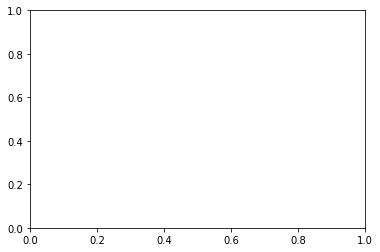

In [52]:
# plot the results
plt.plot(neighbors_num_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

### TEST the model on test set

LEG:  233
(312,)
(312, 3)
target_id:  113 49.6971 
 predictied_id:  93 94.9591 
 id_diff:  20 
 dist between real and predicted (z axis):  -4.5262 cm


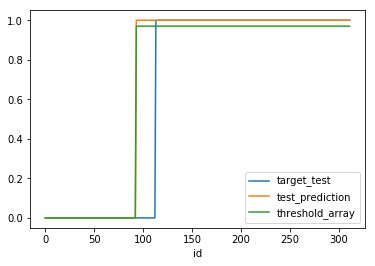

LEG:  234
(260,)
(260, 3)
target_id:  67 74.6672 
 predictied_id:  65 81.2985 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.66313 cm


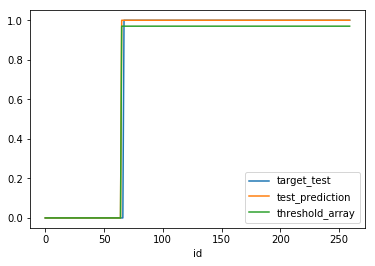

LEG:  235
(320,)
(320, 3)
target_id:  102 -4.29749 
 predictied_id:  85 49.704 
 id_diff:  17 
 dist between real and predicted (z axis):  -5.400149 cm


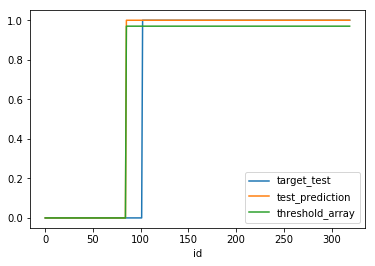

LEG:  236
(233,)
(233, 3)
target_id:  78 -0.185693 
 predictied_id:  77 3.7084 
 id_diff:  1 
 dist between real and predicted (z axis):  -0.3894093 cm


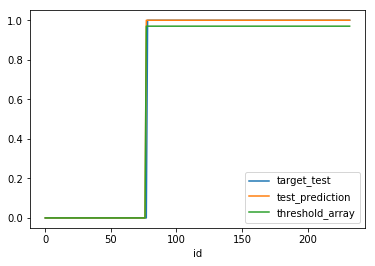

LEG:  237
(205,)
(205, 3)
target_id:  63 36.0691 
 predictied_id:  66 26.2106 
 id_diff:  3 
 dist between real and predicted (z axis):  0.98585 cm


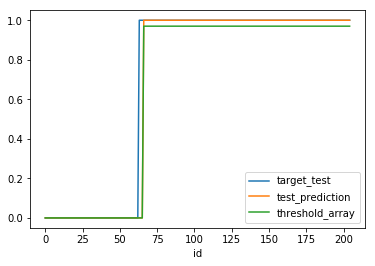

LEG:  238
(204,)
(204, 3)
target_id:  71 4.67964 
 predictied_id:  67 12.7414 
 id_diff:  4 
 dist between real and predicted (z axis):  -0.806176 cm


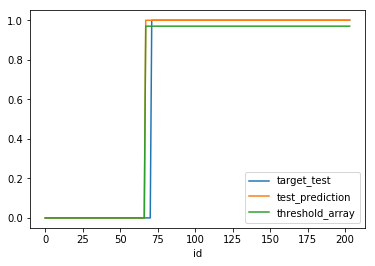

LEG:  239
(161,)
(161, 3)
target_id:  52 50.8168 
 predictied_id:  65 9.81032 
 id_diff:  13 
 dist between real and predicted (z axis):  4.100648 cm


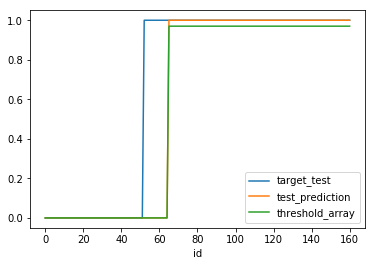

LEG:  240
(198,)
(198, 3)
target_id:  68 -7.72164 
 predictied_id:  66 -3.82035 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.390129 cm


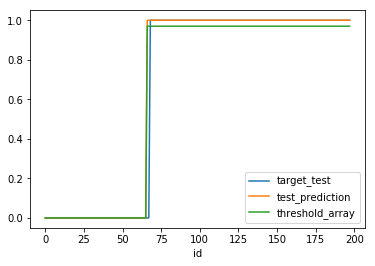

LEG:  241
(241,)
(241, 3)
target_id:  90 -20.0249 
 predictied_id:  79 2.67795 
 id_diff:  11 
 dist between real and predicted (z axis):  -2.270285 cm


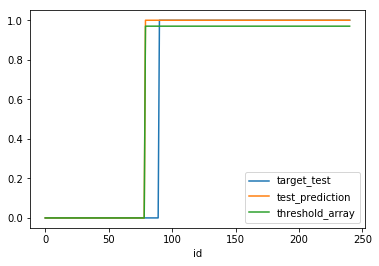

LEG:  242
(244,)
(244, 3)
target_id:  95 -24.0974 
 predictied_id:  80 6.83544 
 id_diff:  15 
 dist between real and predicted (z axis):  -3.093284 cm


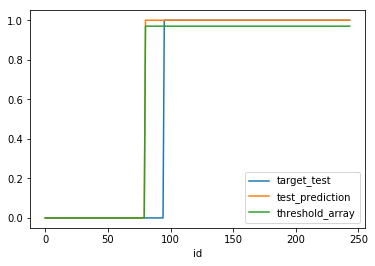

LEG:  243
(205,)
(205, 3)
target_id:  78 -13.5417 
 predictied_id:  77 -11.9185 
 id_diff:  1 
 dist between real and predicted (z axis):  -0.16232 cm


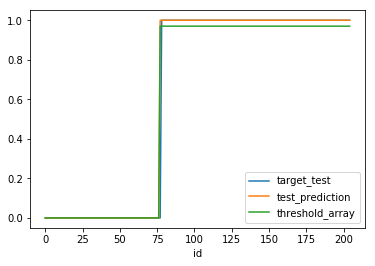

LEG:  244
(206,)
(206, 3)
target_id:  76 -4.57284 
 predictied_id:  75 -1.70803 
 id_diff:  1 
 dist between real and predicted (z axis):  -0.286481 cm


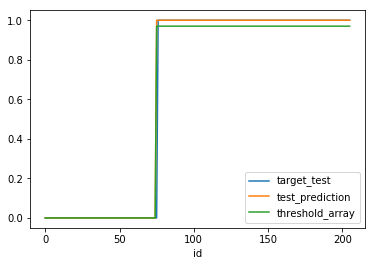

LEG:  245
(155,)
(155, 3)
target_id:  60 -2.49759 
 predictied_id:  67 -26.1506 
 id_diff:  7 
 dist between real and predicted (z axis):  2.365301 cm


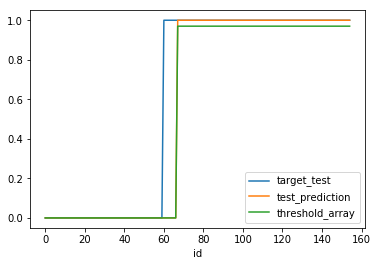

LEG:  246
(173,)
(173, 3)
target_id:  84 -8.00712 
 predictied_id:  72 11.1766 
 id_diff:  12 
 dist between real and predicted (z axis):  -1.918372 cm


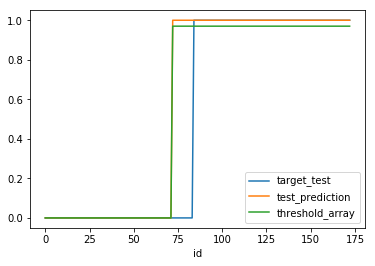

LEG:  247
(115,)
(115, 3)
target_id:  54 -9.64151 
 predictied_id:  45 11.3017 
 id_diff:  9 
 dist between real and predicted (z axis):  -2.094321 cm


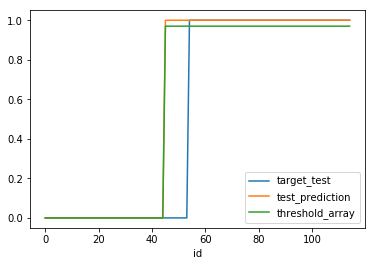

LEG:  248
(119,)
(119, 3)
target_id:  50 3.20765 
 predictied_id:  48 10.2136 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.700595 cm


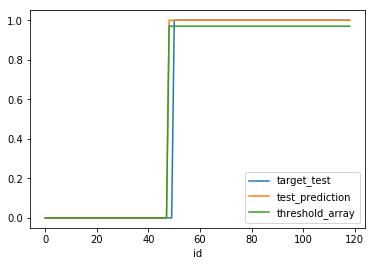

LEG:  249
(205,)
(205, 3)
target_id:  80 2.97355 
 predictied_id:  78 9.20094 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.622739 cm


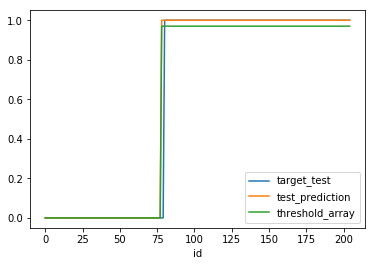

LEG:  250
(223,)
(223, 3)
target_id:  67 16.9494 
 predictied_id:  62 29.983 
 id_diff:  5 
 dist between real and predicted (z axis):  -1.30336 cm


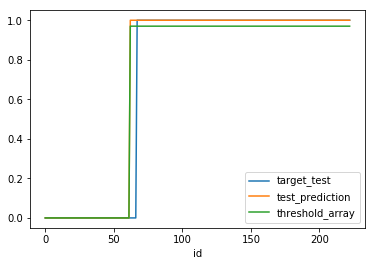

LEG:  251
(148,)
(148, 3)
target_id:  58 -61.6891 
 predictied_id:  61 -69.0264 
 id_diff:  3 
 dist between real and predicted (z axis):  0.73373 cm


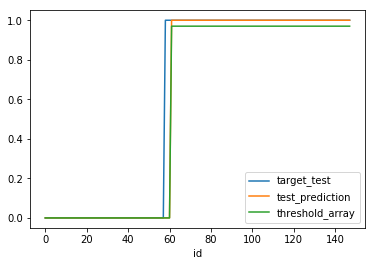

LEG:  252
(158,)
(158, 3)
target_id:  58 -1.86728 
 predictied_id:  59 -4.43254 
 id_diff:  1 
 dist between real and predicted (z axis):  0.256526 cm


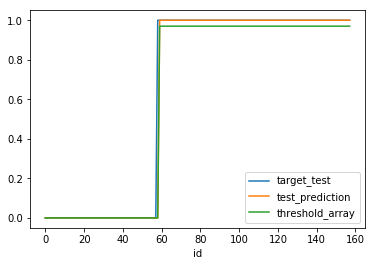

LEG:  253
(174,)
(174, 3)
target_id:  59 13.8275 
 predictied_id:  57 19.1904 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.53629 cm


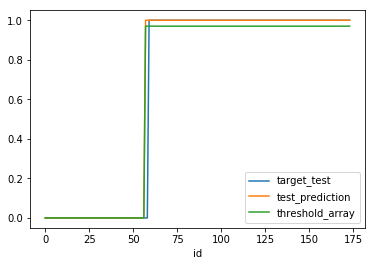

LEG:  254
(283,)
(283, 3)
target_id:  56 91.5177 
 predictied_id:  58 86.0117 
 id_diff:  2 
 dist between real and predicted (z axis):  0.5506 cm


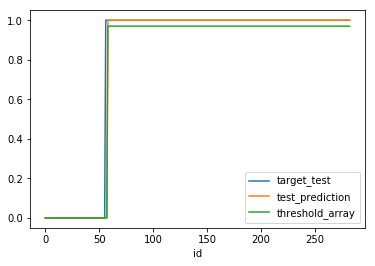

LEG:  255
(112,)
(112, 3)
target_id:  38 -2.09835 
 predictied_id:  36 3.1809 
 id_diff:  2 
 dist between real and predicted (z axis):  -0.527925 cm


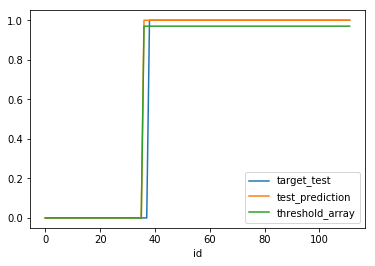

LEG:  256
(295,)
(295, 3)
target_id:  89 20.7508 
 predictied_id:  83 37.3528 
 id_diff:  6 
 dist between real and predicted (z axis):  -1.6602 cm


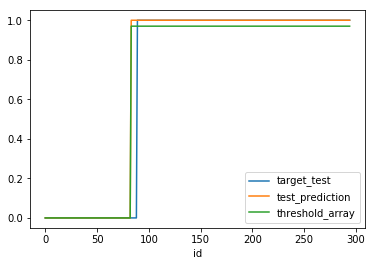

LEG:  257
(180,)
(180, 3)
target_id:  46 22.5729 
 predictied_id:  43 33.5425 
 id_diff:  3 
 dist between real and predicted (z axis):  -1.09696 cm


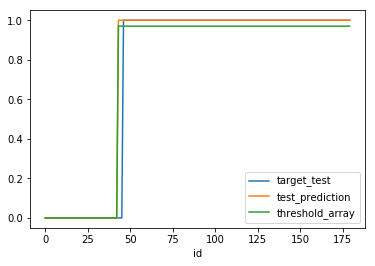

LEG:  258
(199,)
(199, 3)
target_id:  72 22.439 
 predictied_id:  59 52.0253 
 id_diff:  13 
 dist between real and predicted (z axis):  -2.95863 cm


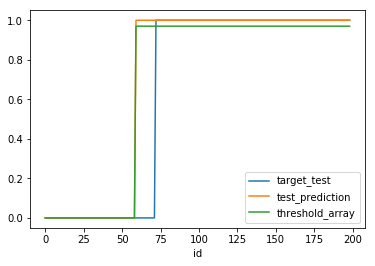

LEG:  259
(165,)
(165, 3)
target_id:  46 7.45973 
 predictied_id:  48 1.93805 
 id_diff:  2 
 dist between real and predicted (z axis):  0.552168 cm


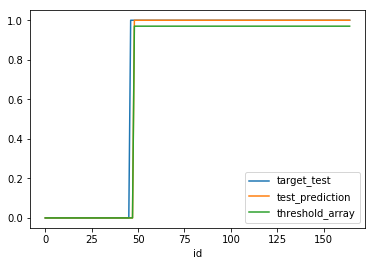

LEG:  260
(115,)
(115, 3)
target_id:  34 3.87358 
 predictied_id:  36 -3.97434 
 id_diff:  2 
 dist between real and predicted (z axis):  0.784792 cm


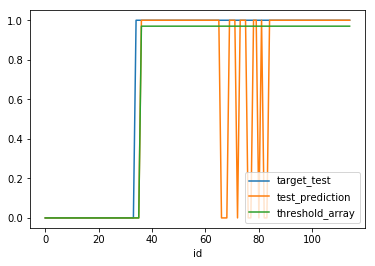

LEG:  261
(123,)
(123, 3)
target_id:  36 25.1567 
 predictied_id:  38 19.9572 
 id_diff:  2 
 dist between real and predicted (z axis):  0.51995 cm


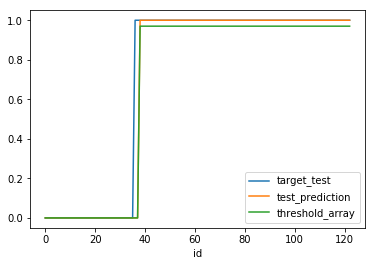

LEG:  262
(82,)
(82, 3)
target_id:  24 32.8327 
 predictied_id:  29 15.7798 
 id_diff:  5 
 dist between real and predicted (z axis):  1.70529 cm


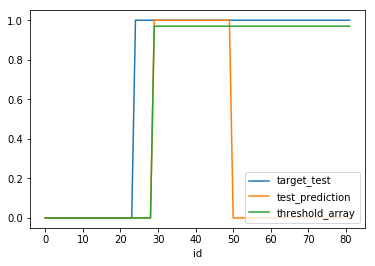



Tolerance intervall
average distance: +- 1.46539367667 cm


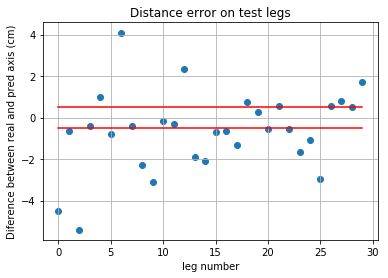

34 % < 10mm


In [89]:
SHOW_INDIV_CLASSIFICATION = True
delta_z_pred_to_target = []
dist_under_5_cm = 0

for leg_no in range(train_test_split_pt+20, 263): 
    print('LEG: ', leg_no)
        
    all_pt_df = create_features(leg_no, leg_no+1)
    # Add a name to the colums of the data frame
#     df_cols_name = ['curvature',
#                     'radius',
#                     'torsion',
#                     'normal_x',
#                     'normal_y',
#                     'normal_z',
#                     'tangente_x',
#                     'tangente_y',
#                     'tangente_z',
#                     'smallest_rad_under_knee',
#                     'pt_num_array',

#                     'pt_class']

    all_pt_df.columns = df_cols_name
    # Selecting the test and training values
    features_test = np.array(all_pt_df[selected_features])
    
    target_test = np.array(all_pt_df['pt_class'])
    
    ##### TODO: Trouver une moyen de ne pas avoir a convertir to np.array()
    
    # Initialize
    test_prediction = [] 
    pred_threshold = np.zeros(target_test.shape)
    print(target_test.shape)
    print(legs[leg_no].Points.shape)
    one_predicted = False
    first_target_encounter = False
    
    for pt_no, (feature, target) in enumerate(zip(features_test, 
                                                  target_test)):
        # PRED value for each point
        pred = knn.predict([feature])
        pred_val = knn.predict([feature])
        #pred = logreg.predict([feature])
        #pred = svm_clf.predict([feature])
        #pred  = sdg_clf.predict([feature])
        
        test_prediction.append(pred[0])
        if pred == 1 and not one_predicted: 
            one_predicted = True
            pred_threshold[pt_no:] = 0.97
            predicted_id = pt_no
        if target == 1 and not first_target_encounter: 
            first_target_encounter = True
            target_id = pt_no
        
    # Z pos of predicted and target value
    z_pos_target = legs[leg_no].Points[target_id][2]
    z_pos_pred = legs[leg_no].Points[predicted_id][2]
    delta_z_pred_to_target.append((z_pos_target - z_pos_pred)/10)
    
    if SHOW_INDIV_CLASSIFICATION: 
        dist_btw_real_predicted = (z_pos_target - z_pos_pred)/10
        print('target_id: ', target_id, z_pos_target, '\n', 
              'predictied_id: ', predicted_id, z_pos_pred, '\n',
              'id_diff: ', abs(target_id - predicted_id), '\n',
              'dist between real and predicted (z axis): ', 
              dist_btw_real_predicted, 'cm')
        if abs(dist_btw_real_predicted) < 1: 
            dist_under_5_cm += 1
        
        fig, ax = plt.subplots()
        ax.plot(target_test, label='target_test')
        ax.plot(test_prediction, label='test_prediction')
        ax.plot(pred_threshold, label='threshold_array')
        legend = ax.legend(loc='lower right')
        plt.xlabel('id')
        plt.show()

num_of_test_legs = len(delta_z_pred_to_target)
xs = list(range(num_of_test_legs))
plt.scatter(xs, delta_z_pred_to_target)
# Tolerance intervall
print('\n\nTolerance intervall')
plt.plot(xs, 0.5*np.ones(num_of_test_legs), color='r')
plt.plot(xs, -0.5*np.ones(num_of_test_legs), color='r')
plt.title('Distance error on test legs')
plt.xlabel('leg number')
plt.ylabel('Diference between real and pred axis (cm)')
plt.grid(which='both')

dist_z_sum = 0 
for dist in delta_z_pred_to_target: 
    dist_z_sum += abs(dist)
print('average distance: +-', dist_z_sum/num_of_test_legs, 'cm')

plt.show()

print(dist_under_5_cm * 2, '% < 10mm')
    

50